In [1]:
import math
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import SimpleImputer


## function file imports
from env import user, host, password, sql_connect

## Data Wrangling Exercise: Zillow

In [2]:
## Building my massive SQL query to join all the tables together filtering for unique properties
## and properties with no

sql_query = '''
select * from properties_2017
Join predictions_2017 using(parcelid)
Left Join airconditioningtype ON properties_2017.airconditioningtypeid = airconditioningtype.airconditioningtypeid
Left Join architecturalstyletype ON properties_2017.architecturalstyletypeid = architecturalstyletype.architecturalstyletypeid
Left Join buildingclasstype ON properties_2017.buildingclasstypeid = buildingclasstype.buildingclasstypeid
Left Join heatingorsystemtype ON properties_2017.heatingorsystemtypeid = heatingorsystemtype.heatingorsystemtypeid
Left Join propertylandusetype ON properties_2017.propertylandusetypeid = propertylandusetype.propertylandusetypeid
Left Join storytype ON properties_2017.storytypeid = storytype.storytypeid
Left Join typeconstructiontype ON properties_2017.typeconstructiontypeid = typeconstructiontype.typeconstructiontypeid
Where properties_2017.latitude != 'NULL' and properties_2017.longitude != 'NULL';
'''

In [3]:
## <-- reading my giant SQL query into a pandas dataframe using my sql_connect function from env.py

zillow_df = pd.read_sql(sql_query, sql_connect('zillow'))
zillow_df.head()  ## <-- diplaying sample of dataframe (5 rows)

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,buildingclasstypeid,buildingclassdesc,heatingorsystemtypeid,heatingorsystemdesc,propertylandusetypeid,propertylandusedesc,storytypeid,storydesc,typeconstructiontypeid,typeconstructiondesc
0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,NaN,None,NaN,None,261,Single Family Residential,NaN,None,NaN,None
1,17052889,1387261,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,NaN,None,NaN,None,261,Single Family Residential,NaN,None,NaN,None
2,14186244,11677,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,NaN,None,NaN,None,261,Single Family Residential,NaN,None,NaN,None
3,12177905,2288172,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,NaN,None,2.0,Central,261,Single Family Residential,NaN,None,NaN,None
4,10887214,1970746,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,NaN,None,2.0,Central,266,Condominium,NaN,None,NaN,None


In [4]:
zillow_df.shape ## <--looking at shape before dropping the duplicates

(77580, 76)

In [5]:
zillow_df = zillow_df.loc[:, ~zillow_df.columns.duplicated()]
zillow_df.shape

(77580, 68)

In [6]:
zillow_df['parcelid']

0        14297519
1        17052889
2        14186244
3        12177905
4        10887214
           ...   
77575    11000655
77576    17239384
77577    12773139
77578    12826780
77579    13083743
Name: parcelid, Length: 77580, dtype: int64

In [7]:
zillow_df = zillow_df.groupby('parcelid').max('transactiondate') ##filtering for most recent transactions
zillow_df.shape  ## <--looking at shape to determine we dropped duplciates

(77381, 56)

In [8]:
zillow_df = zillow_df.drop(columns = 'id')

In [9]:
zillow_df.head() 

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,...,NaN,NaN,249655.0,624139.0,2016.0,374484.0,7659.36,NaN,6.037113e+13,-0.007357
10711877,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,...,NaN,NaN,253000.0,660000.0,2016.0,407000.0,8123.91,NaN,6.037113e+13,0.021066
10711888,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,...,NaN,NaN,257591.0,542923.0,2016.0,285332.0,6673.24,NaN,6.037113e+13,0.077174
10711910,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,...,NaN,NaN,57968.0,78031.0,2016.0,20063.0,1116.46,NaN,6.037113e+13,-0.041238
10711923,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,...,NaN,NaN,167869.0,415459.0,2016.0,247590.0,5239.85,NaN,6.037113e+13,-0.009496


In [10]:
def summarize(df):
    '''
    summarize will take in a single argument (a pandas dataframe) 
    and output to console various statistics on said dataframe, including:
    # .head()
    # .info()
    # .describe()
    # value_counts()
    # observation of nulls in the dataframe
    '''
    print('=====================================================')
    print('Dataframe head: ')
    print(df.head(3))
    print('=====================================================')
    print('Dataframe info: ')
    print(df.info())
    print('=====================================================')
    print('Dataframe Description: ')
    print(df.describe())

In [11]:
summarize(zillow_df)

Dataframe head: 
          airconditioningtypeid  architecturalstyletypeid  basementsqft  \
parcelid                                                                  
10711855                    NaN                       NaN           NaN   
10711877                    1.0                       NaN           NaN   
10711888                    1.0                       NaN           NaN   

          bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
parcelid                                                                        
10711855          2.0         3.0                  NaN                    8.0   
10711877          2.0         4.0                  NaN                    8.0   
10711888          2.0         4.0                  NaN                    8.0   

          calculatedbathnbr  decktypeid  finishedfloor1squarefeet  ...  \
parcelid                                                           ...   
10711855                2.0         NaN              

In [12]:
def df_value_counts(df):

    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    cat_cols = [col for col in df.columns if col not in num_cols]
    
    print('DataFrame value counts: ')
    print('------------------------------------------')
    print('')
    for col in df.columns:
        if col in cat_cols:
            print(df[col].value_counts())
        else:
            print(df[col].value_counts(bins=10, sort=False))
            print('-------------------------------------------')
            print('')

In [13]:
df_value_counts(zillow_df)

DataFrame value counts: 
------------------------------------------

(0.987, 2.2]    23133
(2.2, 3.4]          0
(3.4, 4.6]          0
(4.6, 5.8]        167
(5.8, 7.0]          0
(7.0, 8.2]          0
(8.2, 9.4]         26
(9.4, 10.6]         0
(10.6, 11.8]       53
(11.8, 13.0]     1574
Name: airconditioningtypeid, dtype: int64
-------------------------------------------

(1.9800000000000002, 3.9]      8
(3.9, 5.8]                     0
(5.8, 7.7]                   172
(7.7, 9.6]                    19
(9.6, 11.5]                    0
(11.5, 13.4]                   0
(13.4, 15.3]                   0
(15.3, 17.2]                   0
(17.2, 19.1]                   0
(19.1, 21.0]                   7
Name: architecturalstyletypeid, dtype: int64
-------------------------------------------

(34.477000000000004, 390.2]    20
(390.2, 742.4]                 16
(742.4, 1094.6]                 7
(1094.6, 1446.8]                3
(1446.8, 1799.0]                0
(1799.0, 2151.2]                2


In [14]:
def histogram_df(df):

    for col in df.columns:
        df[col].hist()
        plt.ylabel('Frequency')
        plt.xlabel(f'{col} value')
        plt.title(f'Distribution of {col}')
        plt.show()

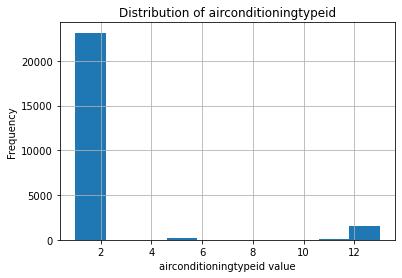

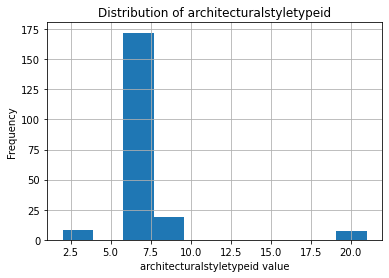

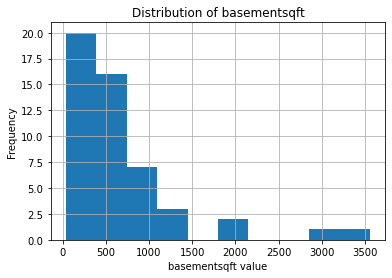

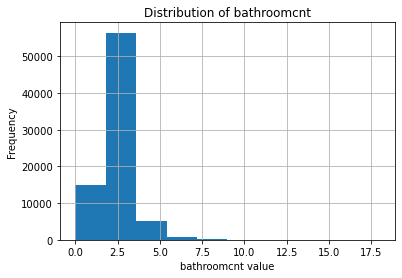

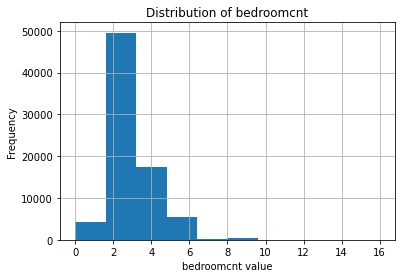

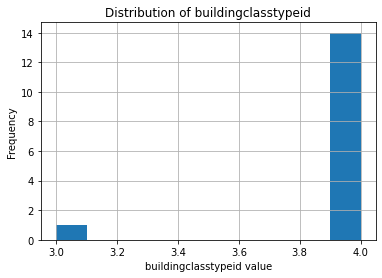

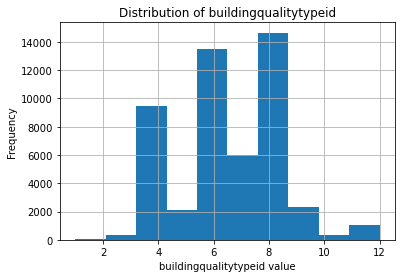

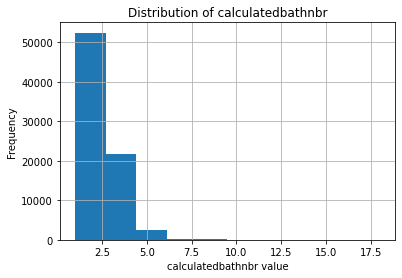

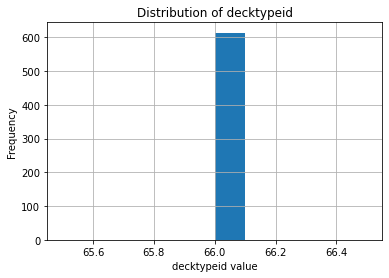

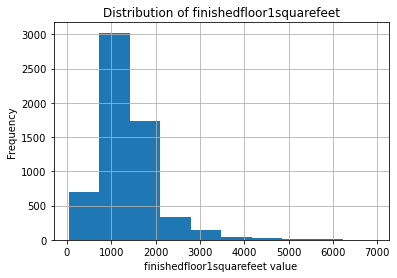

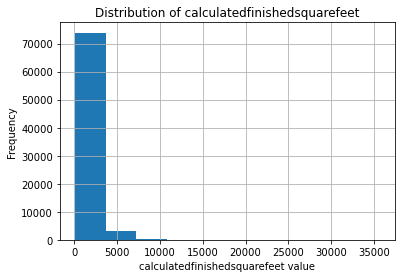

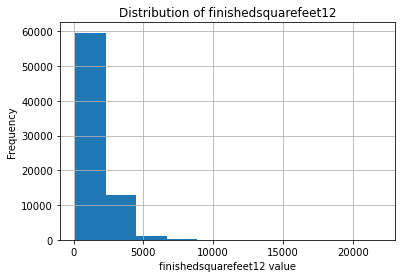

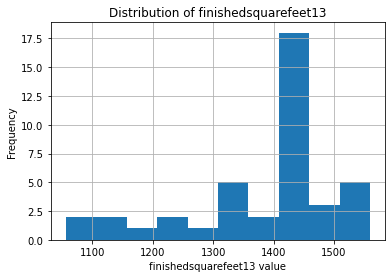

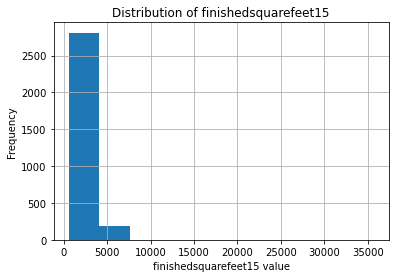

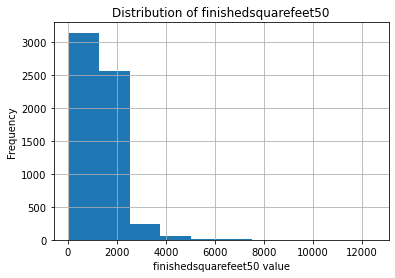

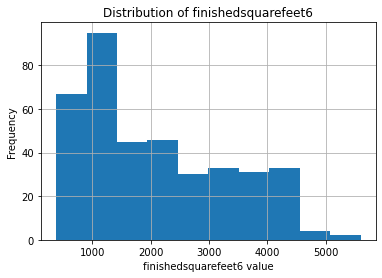

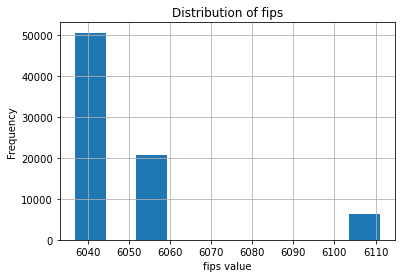

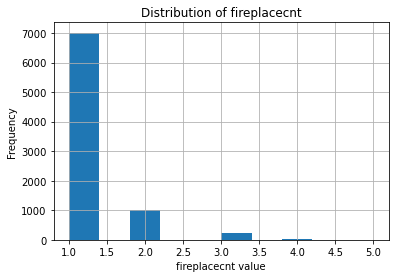

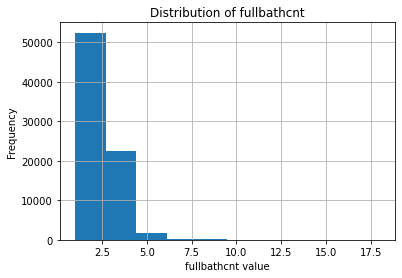

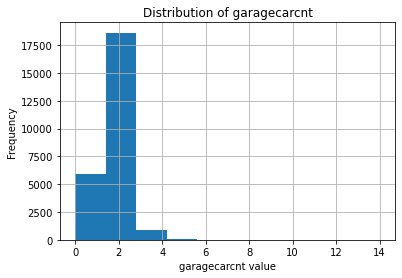

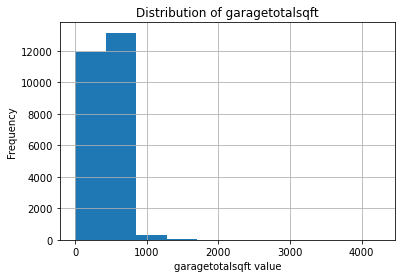

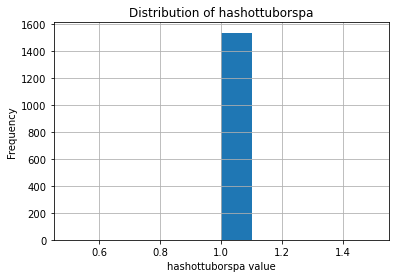

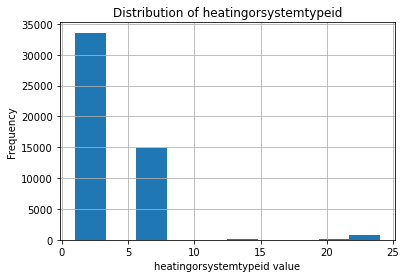

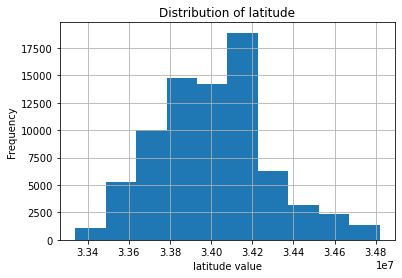

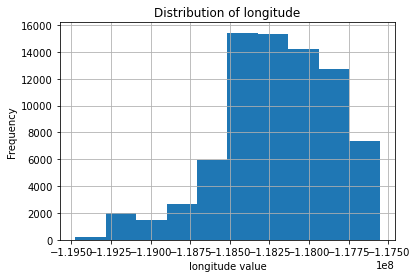

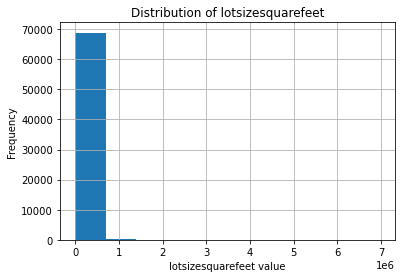

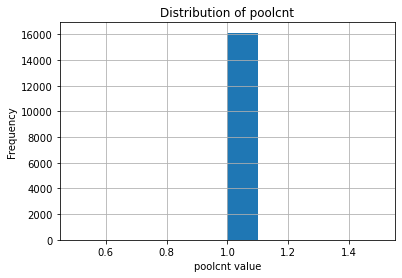

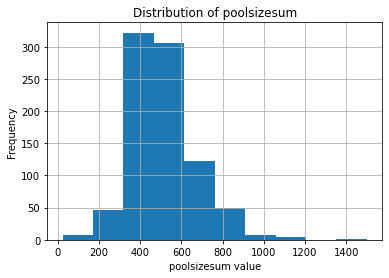

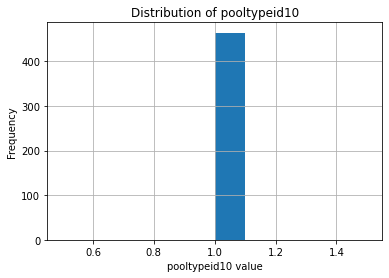

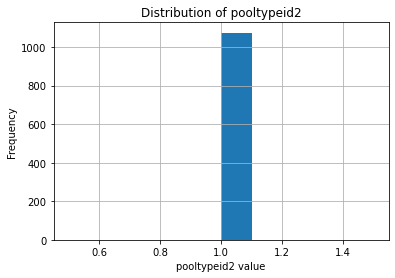

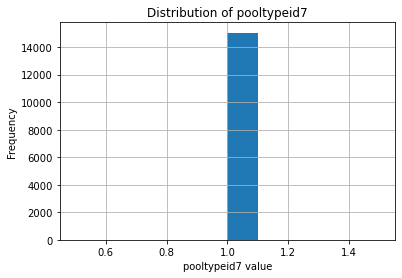

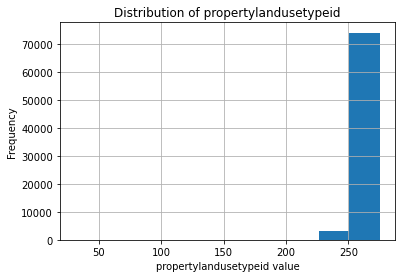

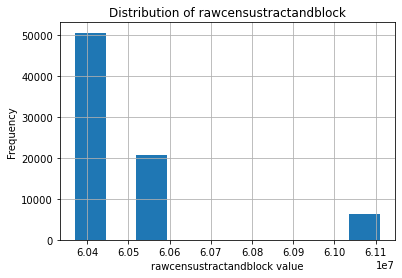

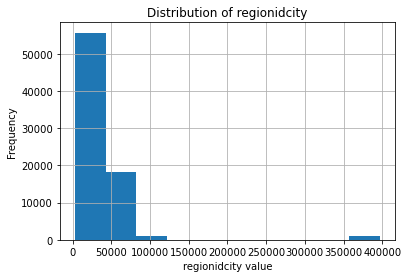

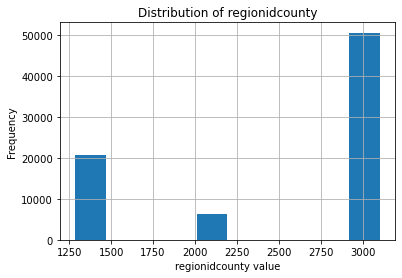

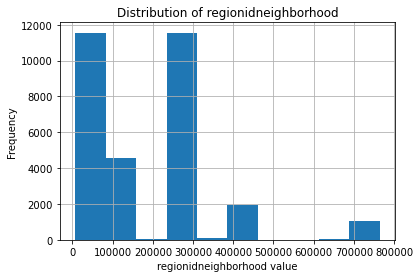

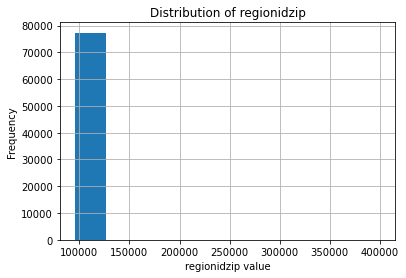

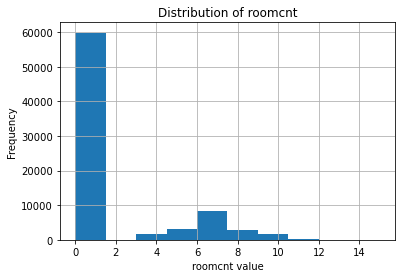

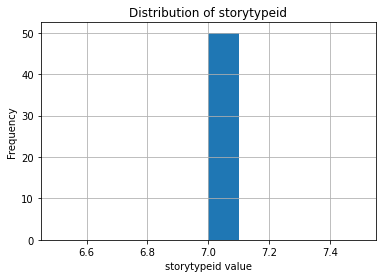

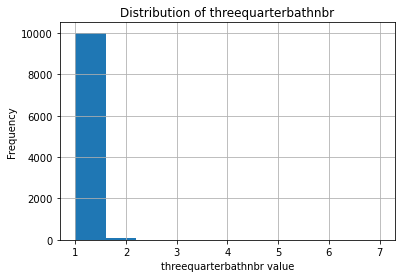

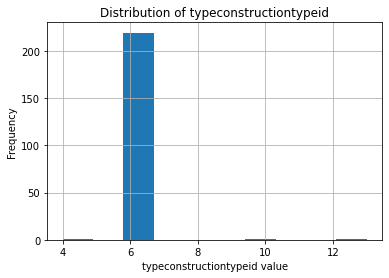

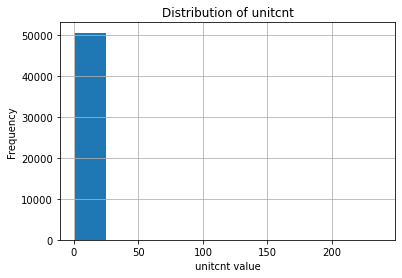

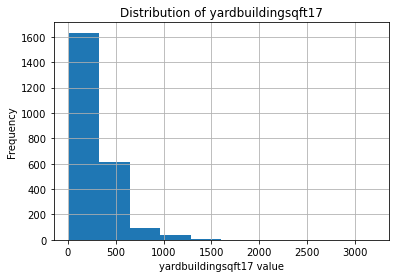

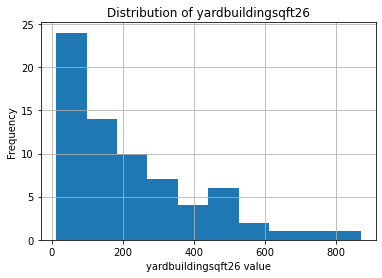

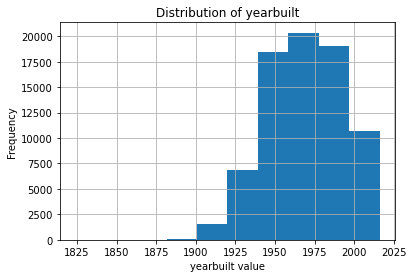

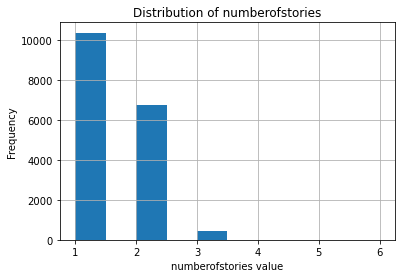

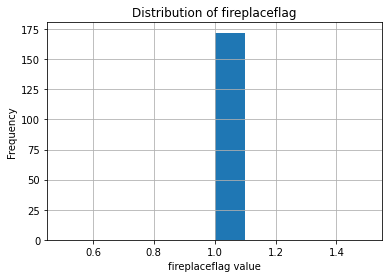

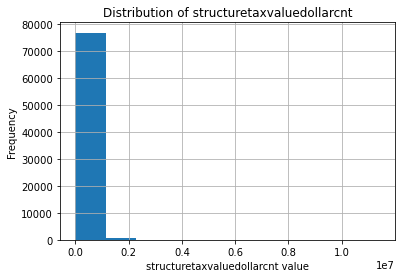

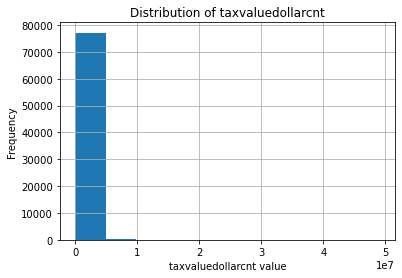

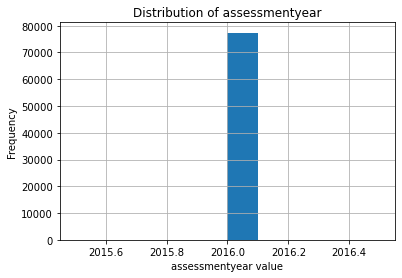

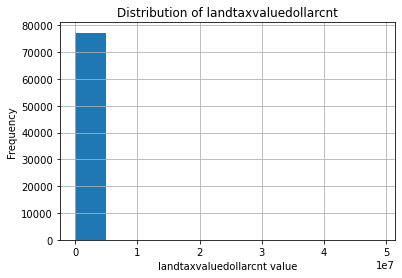

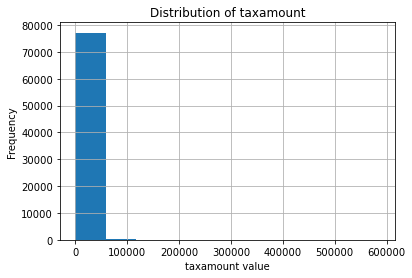

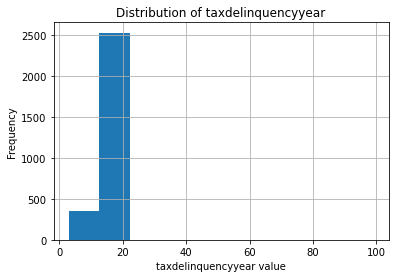

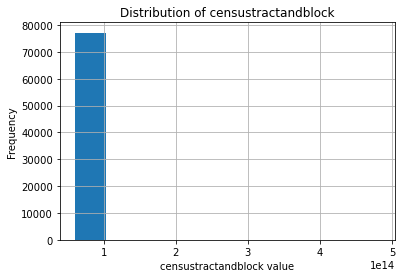

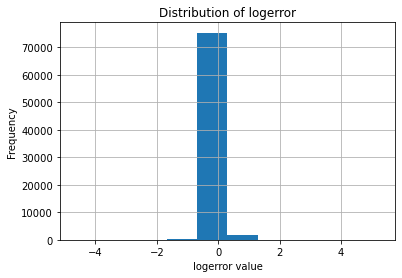

In [15]:
histogram_df(zillow_df)

In [16]:
zillow_df.columns

Index(['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'fireplaceflag', 'str

In [17]:
## looking at the null values in the variables

num_missing = zillow_df.isnull().sum()
pct_missing = zillow_df.isnull().sum()/zillow_df.shape[0]

In [18]:
pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing}) # create dataframe using variables

,num_rows_missing,pct_rows_missing
airconditioningtypeid,52428,0.677531
architecturalstyletypeid,77175,0.997338
basementsqft,77331,0.999354
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingclasstypeid,77366,0.999806
buildingqualitytypeid,27709,0.358085
calculatedbathnbr,609,0.007870
decktypeid,76767,0.992065
finishedfloor1squarefeet,71358,0.922164


In [19]:
def nulls_by_col(df):
    '''
    This function takes in a dataframe and provides a percentage look 
    at the columns with null values (values, and percent missing)
    '''
    
    num_missing = df.isnull().sum()
    pct_missing = df.isnull().sum()/df.shape[0]
    
    df = pd.DataFrame({'num_rows_missing': num_missing, 
                       'pct_rows_missing': pct_missing}) # create dataframe using variables
    return df

In [20]:
nulls_by_col(zillow_df)

,num_rows_missing,pct_rows_missing
airconditioningtypeid,52428,0.677531
architecturalstyletypeid,77175,0.997338
basementsqft,77331,0.999354
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingclasstypeid,77366,0.999806
buildingqualitytypeid,27709,0.358085
calculatedbathnbr,609,0.007870
decktypeid,76767,0.992065
finishedfloor1squarefeet,71358,0.922164


In [21]:
def nulls_by_row(df):
    '''take in a dataframe 
       get count of missing columns per row
       percent of missing columns per row 
       and number of rows missing the same number of columns
       in a dataframe'''
    
    num_cols_missing = df.isnull().sum(axis=1) # number of columns that are missing in each row
    
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100  # percent of columns missing in each row 
    
    # create a dataframe for the series and reset the index creating an index column
    # group by count of both columns, turns index column into a count of matching rows
    # change the index name and reset the index
    
    return (pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index()
            .groupby(['num_cols_missing','pct_cols_missing']).count()
            .rename(index=str, columns={'index': 'num_rows'}).reset_index())

In [22]:
nulls_by_row(zillow_df)

,num_cols_missing,pct_cols_missing,parcelid
0,17,30.909090909090907,2
1,18,32.72727272727273,10
2,19,34.54545454545455,79
3,20,36.36363636363637,264
4,21,38.18181818181819,423
5,22,40.0,444
6,23,41.81818181818181,1194
7,24,43.63636363636363,7188
8,25,45.45454545454545,8686
9,26,47.27272727272727,11856


## Preparing Zillow

In [23]:
# remove rows based on propertylanduse
zillow_df = zillow_df[(zillow_df.propertylandusetypeid == 261) |
          (zillow_df.propertylandusetypeid == 263) |
          (zillow_df.propertylandusetypeid == 275) |
          (zillow_df.propertylandusetypeid == 264)]

In [24]:
zillow_df.head()

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,...,NaN,NaN,249655.0,624139.0,2016.0,374484.0,7659.36,NaN,6.037113e+13,-0.007357
10711877,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,...,NaN,NaN,253000.0,660000.0,2016.0,407000.0,8123.91,NaN,6.037113e+13,0.021066
10711888,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,...,NaN,NaN,257591.0,542923.0,2016.0,285332.0,6673.24,NaN,6.037113e+13,0.077174
10711910,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,NaN,NaN,...,NaN,NaN,57968.0,78031.0,2016.0,20063.0,1116.46,NaN,6.037113e+13,-0.041238
10711923,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,NaN,NaN,...,NaN,NaN,167869.0,415459.0,2016.0,247590.0,5239.85,NaN,6.037113e+13,-0.009496


<AxesSubplot:>

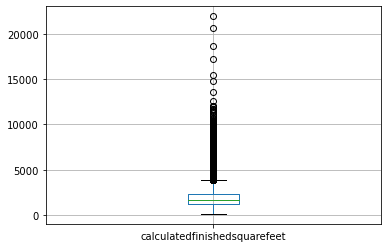

In [25]:
zillow_df.boxplot(column='calculatedfinishedsquarefeet')

<AxesSubplot:>

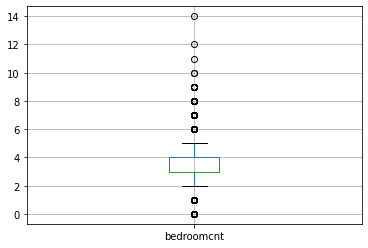

In [26]:
zillow_df.boxplot(column = 'bedroomcnt')

<AxesSubplot:>

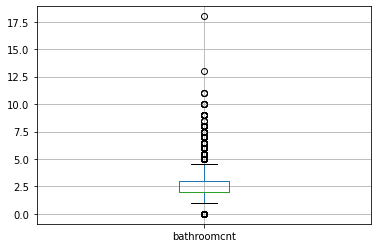

In [27]:
zillow_df.boxplot(column = 'bathroomcnt')

In [28]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[f'{col}'].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[f'{col}'] > lower_bound) & (df[f'{col}'] < upper_bound)]
        
    return df

In [29]:
zillow_df = remove_outliers(zillow_df, 1.5, ['calculatedfinishedsquarefeet', 
                                             'bedroomcnt', 'bathroomcnt'])
zillow_df.shape

(48330, 55)

In [30]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .5):
    ''' 
        take in a dataframe and a proportion for columns and rows
        return dataframe with columns and rows not meeting proportions dropped
    '''
    col_thresh = int(round(prop_required_column*df.shape[0],0)) # calc column threshold
    
    df.dropna(axis=1, thresh=col_thresh, inplace=True) # drop columns with non-nulls less than threshold
    
    row_thresh = int(round(prop_required_row*df.shape[1],0))  # calc row threshhold
    
    df.dropna(axis=0, thresh=row_thresh, inplace=True) # drop columns with non-nulls less than threshold
    
    return df

In [31]:
# setting baseline's for columns and rows with 50% nulls
prop_required_column = .5
prop_required_row = .5

In [32]:
## calculate the number of 50% roughly

int(round(prop_required_column*zillow_df.shape[0],0))

24165

In [33]:
## set as thresh

col_thresh = int(round(prop_required_column*zillow_df.shape[0],0))

In [34]:
# drop columns based on threshold number
zillow_df.dropna(axis=1, thresh=col_thresh, inplace=True)
zillow_df.shape

(48330, 27)

In [35]:
zillow_df.isnull().sum()[zillow_df.isnull().sum()>0] # look at cols with nulls

buildingqualitytypeid         16850
calculatedbathnbr                14
finishedsquarefeet12            154
fullbathcnt                      14
heatingorsystemtypeid         16769
lotsizesquarefeet               257
regionidcity                    901
regionidzip                      18
unitcnt                       16842
yearbuilt                        24
structuretaxvaluedollarcnt       61
taxvaluedollarcnt                 1
landtaxvaluedollarcnt             1
taxamount                         4
censustractandblock              82
dtype: int64

In [36]:
zillow_df.isnull().sum()[zillow_df.isnull().sum()>16000] # look at cols with large amounts of nulls

buildingqualitytypeid    16850
heatingorsystemtypeid    16769
unitcnt                  16842
dtype: int64

In [37]:
# dropping the columns with 16K missing values too much to fill/impute/drop rows

zillow_df = zillow_df.drop(columns=['heatingorsystemtypeid', 'buildingqualitytypeid', 'unitcnt'])

In [38]:
zillow_df.shape

(48330, 24)

In [39]:
# impute columns *do this after you split*

def impute(df, my_strategy, column_list):
    ''' take in a df, strategy, and cloumn list
        return df with listed columns imputed using input stratagy
    '''
        
    imputer = SimpleImputer(strategy=my_strategy)  # build imputer

    df[column_list] = imputer.fit_transform(df[column_list]) # fit/transform selected columns

    return df

In [40]:
zillow_df = impute(zillow_df, 'most_frequent', ['calculatedbathnbr', 
                                                'fullbathcnt', 'regionidcity', 
                                                'regionidzip', 'yearbuilt', 
                                                'censustractandblock'])

In [41]:
zillow_df.isnull().sum()[zillow_df.isnull().sum()>0] # look at remaining nulls

finishedsquarefeet12          154
lotsizesquarefeet             257
structuretaxvaluedollarcnt     61
taxvaluedollarcnt               1
landtaxvaluedollarcnt           1
taxamount                       4
dtype: int64

In [42]:
zillow_df = impute(zillow_df, 'median', ['finishedsquarefeet12', 'lotsizesquarefeet', 
                                         'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 
                                         'landtaxvaluedollarcnt', 'taxamount'])

In [43]:
zillow_df.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
dtype: int64